In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [3]:
d=pd.read_csv("Iris.csv")
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
d.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
d.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
d["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
print('',d.isnull().sum())

 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
# Check data types to identify categorical columns
categorical_columns = d.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Species'], dtype='object')


In [11]:
d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

C:\Users\Yashu\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
x = d.loc[:, d.columns != 'Species']
y = d.loc[:, ['Species']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.3)

In [20]:
print(f" X Train shape : {x.shape}, \n Y Train : {y.shape}")

 X Train shape : (150, 5), 
 Y Train : (150, 1)


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(45, 5)
(105, 3)
(45, 3)


In [23]:
model = Sequential([
        keras.layers.Input(shape=x_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1000)                │           6,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 657,703 (2.51 MB)

 Trainable params: 657,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:

model.compile(optimizer='adam', 
              loss =keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.4884 - loss: 3.9308 - val_accuracy: 0.6222 - val_loss: 1.0072
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4426 - loss: 1.6246 - val_accuracy: 0.3556 - val_loss: 0.8566
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4003 - loss: 1.6316 - val_accuracy: 0.7556 - val_loss: 0.5386
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5359 - loss: 1.0798 - val_accuracy: 0.7333 - val_loss: 0.7194
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5029 - loss: 1.4427 - val_accuracy: 0.4222 - val_loss: 1.1286
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6414 - loss: 0.8608 - val_accuracy: 0.8889 - val_loss: 0.5473
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6091 - loss: 0.8630 - val_accuracy: 0.7333 - val_loss: 0.5024
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6673 - loss: 0.6825 - val_accuracy: 0.7556 - val_loss: 0.3794

In [27]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8799 - loss: 0.2380  


[0.25919637084007263, 0.8666666746139526]

In [28]:
y_p=model.predict(x_test)
actual=np.argmax(y_test,1)
y_p=np.argmax(y_p,1)
print("Actual target    :",actual)
print("Predicted output: ",y_p)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Actual target    : [2 0 1 0 0 2 2 1 1 1 0 0 2 2 1 2 2 2 0 2 0 2 0 0 2 0 2 0 0 2 2 1 2 2 2 1 1
 2 2 2 2 2 2 2 1]
Predicted output:  [2 0 1 0 0 2 2 1 1 1 0 0 2 2 1 2 2 2 0 2 0 1 0 0 2 0 1 0 0 2 2 2 2 2 2 1 1
 2 1 2 1 2 2 1 1]


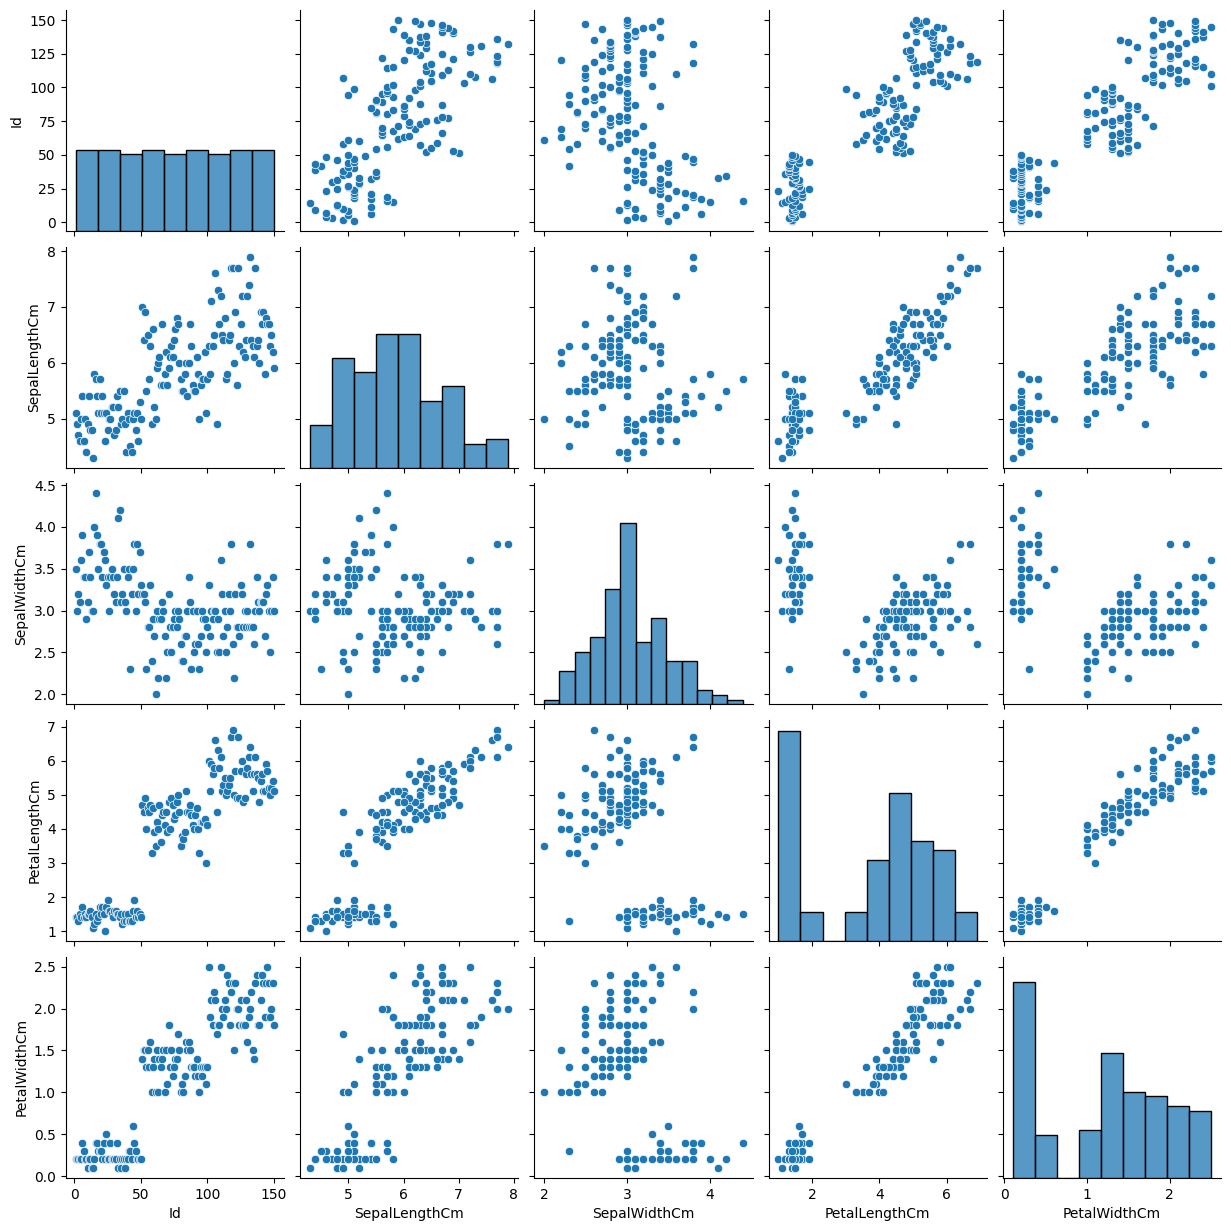

In [36]:
sns.pairplot(d)

C:\Users\Yashu\AppData\Local\Temp\ipykernel_972\4159479112.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  d.hist(ax = ax)


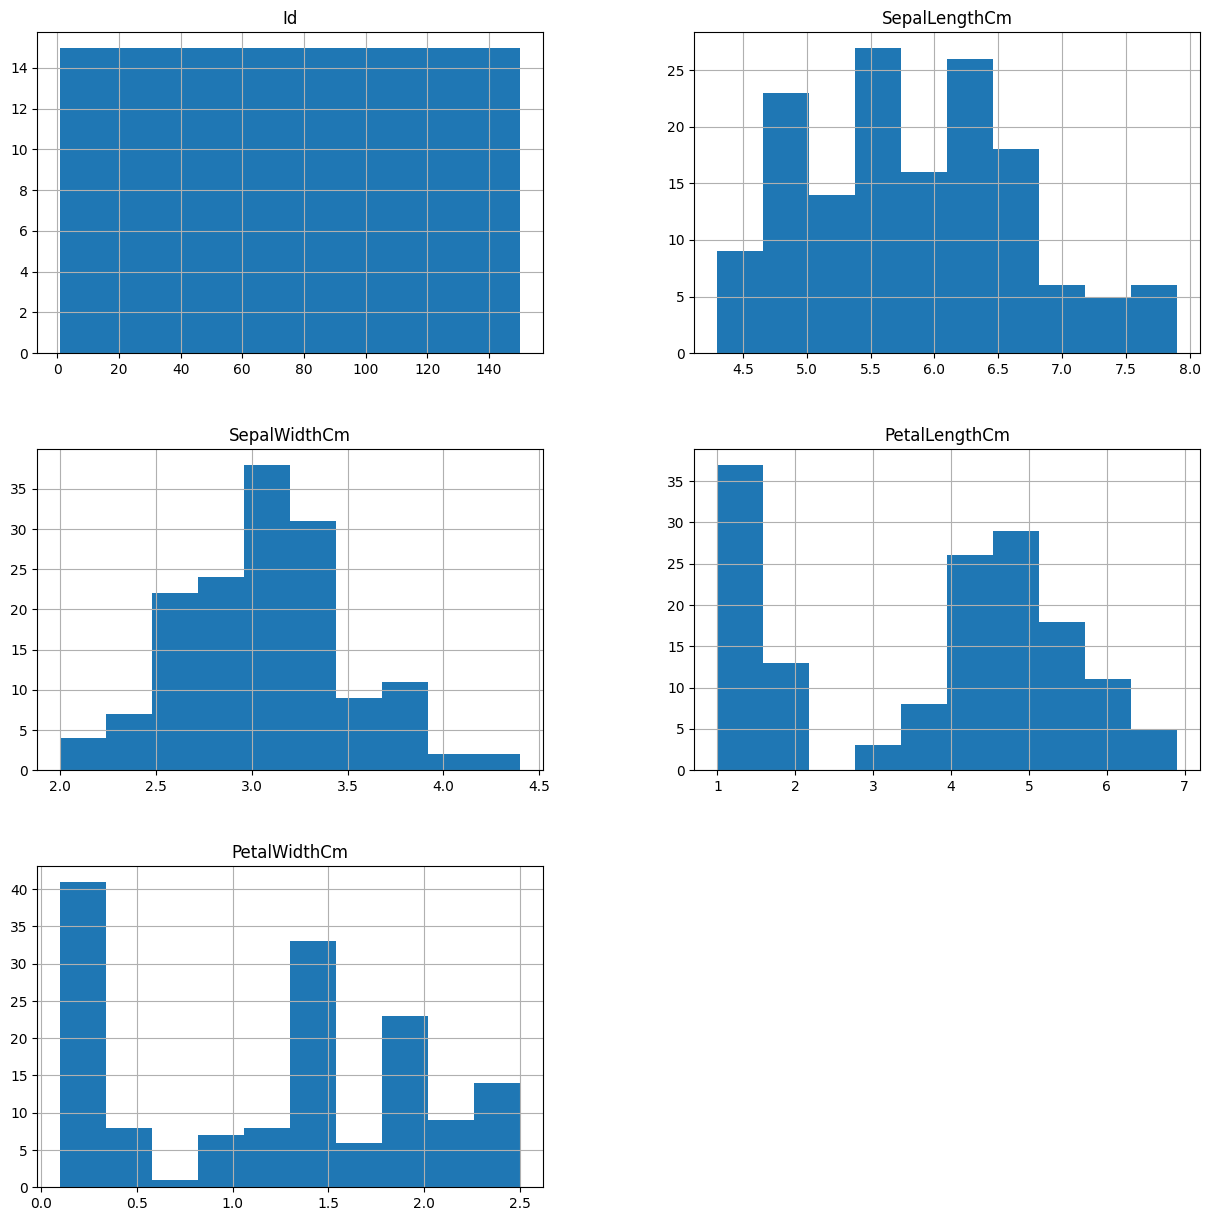

In [37]:

fig = plt.figure(figsize = (15,15))
ax = fig.gca()

d.hist(ax = ax)
plt.show()

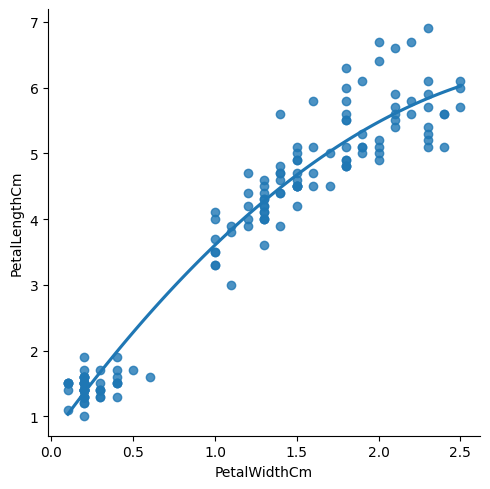

In [40]:

sns.lmplot(x ="PetalWidthCm", y ="PetalLengthCm", data = d, order = 2, ci = None)
plt.show()

In [41]:
# TODO : Correlation between the features
features_correlation = d.drop('Species', axis = 1).corr()
features_correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

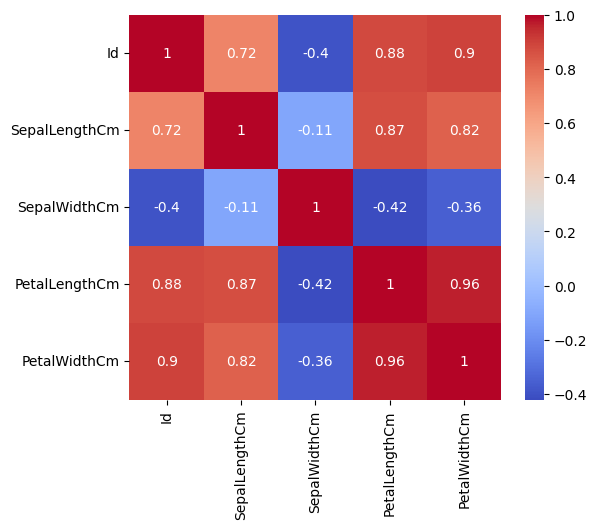

In [42]:
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Heat map
plt.figure(figsize=(6,5))
sns.heatmap(features_correlation,cmap='coolwarm',annot=True)

In [43]:
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
d.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [49]:
y_p=model.predict(x_test)
actual=np.argmax(y_test,1)
y_p=np.argmax(y_p,1)
print("Actual target    :",actual)
print("Predicted output: ",y_p)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Actual target    : [2 0 1 0 0 2 2 1 1 1 0 0 2 2 1 2 2 2 0 2 0 2 0 0 2 0 2 0 0 2 2 1 2 2 2 1 1
 2 2 2 2 2 2 2 1]
Predicted output:  [2 0 1 0 0 2 2 1 1 1 0 0 2 2 1 2 2 2 0 2 0 1 0 0 2 0 1 0 0 2 2 2 2 2 2 1 1
 2 1 2 1 2 2 1 1]


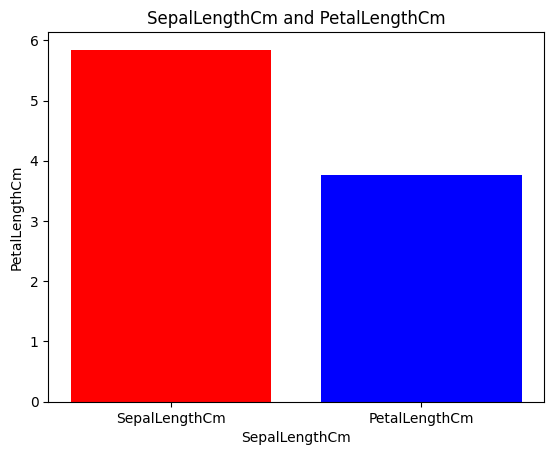

In [51]:
import matplotlib.pyplot as plt


categories = ['SepalLengthCm', 'PetalLengthCm']
mean_values = [5.843333	,3.758667	]

# Create the bar plot
plt.bar(categories, mean_values, color=['red', 'blue'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('SepalLengthCm and PetalLengthCm')
plt.show()
